# UNDER DEVELOPMENT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

%load_ext nb_black

<IPython.core.display.Javascript object>

# Dictionary

* Player: Player's name;
* Nationality: Country of origin or citizenship;
* Position: Positions played(G = Goalkeeper,ZG = Defender,LT = Midfield-);
* Team: Player's Team
* Age: Age in 2022 season
* Year: Year of Birth
* MP: Matches played;
* MS(Início): Matches started playing;
* Min.: Total minutes played;
* 90s: Total minutes played divided by 90;
* Goals: Goals scored by the player;
* Assis: Goals assisted by the player;
* G-PB: Normal Goals scored, Penalties not included;
* PB: Penalties Scored;
* PT: Penalties Kicks;
* CrtsA: Yellow cards;
* CrtV: Red cards;


In [2]:
df_Brasileirao_Players = pd.read_csv("Players.csv", sep=";", index_col="Unnamed: 0")
df_Brasileirao_Players

,Class.,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,90s,CrtsA,CrtV,...,OG,Recuperação,GanhosAereos,PerdasAereos,Ganhos%,Goleiro,Atacante,Lateral,Zagueiro,Tipo
0,1,Abner,br BRA,ZG,Atl Paranaense,22,2000,21.6,6,0,...,0,137.0,20.0,28.0,41.7,0,0,0,1,Defesa
1,2,Adryelson,br BRA,ZG,Botafogo (RJ),24,1998,14.1,1,0,...,0,49.0,68.0,32.0,68.0,0,0,0,1,Defesa
2,3,Adson,br BRA,ATLT,Corinthians,22,2000,13.8,2,0,...,0,54.0,8.0,19.0,29.6,0,1,1,0,Ataque
3,4,Airton,br BRA,AT,Atl Goianiense,23,1999,18.4,3,0,...,0,59.0,19.0,22.0,46.3,0,1,0,0,Ataque
4,5,Carlos Alberto,br BRA,ATLT,América (MG),20,2002,1.7,1,0,...,0,5.0,4.0,9.0,30.8,0,1,1,0,Ataque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,741,Samuel Xavier,br BRA,ZG,Fluminense,32,1990,29.4,4,0,...,0,112.0,24.0,26.0,48.0,0,0,0,1,Defesa
741,742,Yago,br BRA,LTZG,Fluminense,27,1995,11.4,2,0,...,0,50.0,8.0,17.0,32.0,0,0,1,1,Defesa
742,743,Ytalo,br BRA,AT,Bragantino,34,1988,6.9,0,0,...,0,10.0,7.0,14.0,33.3,0,1,0,0,Ataque
743,744,Vinícius Zanocelo,br BRA,LT,Santos,21,2001,22.3,8,0,...,0,112.0,31.0,32.0,49.2,0,0,1,0,Defesa


<IPython.core.display.Javascript object>

In [3]:
df_PremierLeague_Players = pd.read_csv(
    "FBREF/PremierLegue/Premier-League-Players2021-2022.csv", sep=";", decimal="."
)
df_PremierLeague_Players.head()

,Jogador,Nationality,Pos.,Team,Age,Year,MP,MS,Min.,90s,Goals,Assis.,G-PB,PB,PT,Ycards,Rcards
0,Max Aarons,engENG,ZG,Norwich City,21,2000,34,32,2881,32.0,0,2,0,0,0,8,0.0
1,Che Adams,sctSCO,AT,Southampton,25,1996,30,23,2039,22.7,7,3,7,0,0,0,0.0
2,Rayan Aït Nouri,frFRA,"ZG,LT",Wolves,20,2001,23,20,1828,20.3,1,2,1,0,0,4,0.0
3,Kristoffer Ajer,noNOR,ZG,Brentford,23,1998,24,23,1995,22.2,1,3,1,0,0,5,0.0
4,Nathan Aké,nlNED,ZG,Manchester City,26,1995,14,10,923,10.3,2,0,2,0,0,0,0.0


<IPython.core.display.Javascript object>

In [4]:
df_Ligue1_Players = pd.read_csv(
    "FBREF/Ligue1/Ligue-Players-2021-2022.csv", sep=";", decimal="."
)
df_Ligue1_Players.head()

,Player,Nationality,Pos.,Team,Age,Year,MP,MS,Min.,90s,Goals,Assis.,G-PB,PB,PT,Ycards,Rcards
0,Yunis Abdelhamid,maMAR,ZG,Reims,33,1987,34,34,2983,33.1,2,0,2,0,0,5,1
1,Salis Abdul Samed,ghGHA,LT,Clermont Foot,21,2000,31,29,2462,27.4,1,0,1,0,0,12,3
2,Laurent Abergel,frFRA,LT,Lorient,28,1993,34,34,2956,32.8,0,2,0,0,0,9,0
3,Charles Abi,frFRA,AT,Saint-Étienne,21,2000,1,1,45,0.5,0,0,0,0,0,0,0
4,Matthis Abline,frFRA,AT,Rennes,18,2003,7,1,103,1.1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Recuperação', ylabel='FltsP'>

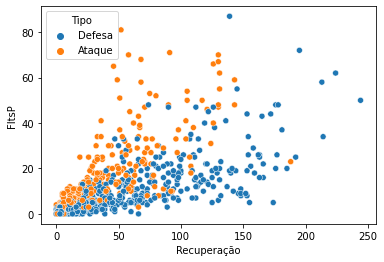

<IPython.core.display.Javascript object>

In [5]:
sns.scatterplot(data=df_Brasileirao_Players, x="Recuperação", y="FltsP", hue="Tipo")

# Random Forest Classifier

In [6]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


<IPython.core.display.Javascript object>

In [7]:
df_Brasileirao_Players.columns

Index(['Class.', 'Jogador', 'Nação', 'Pos.', 'Equipe', 'Idade', 'Nascimento',
       '90s', 'CrtsA', 'CrtV', '2CrdY', 'Fts', 'FltsP', 'Desativado', 'Crz',
       'Crts', 'TklW', 'Pênaltis convertidos', 'PKcon', 'OG', 'Recuperação',
       'GanhosAereos', 'PerdasAereos', 'Ganhos%', 'Goleiro', 'Atacante',
       'Lateral', 'Zagueiro', 'Tipo'],
      dtype='object')

<IPython.core.display.Javascript object>

In [8]:
ord_enc = OrdinalEncoder()
df = pd.DataFrame(
    df_Brasileirao_Players[
        [
            "Idade",
            "90s",
            "CrtsA",
            "Fts",
            "FltsP",
            "Desativado",
            "Crz",
            "Crts",
            "TklW",
        ]
    ]
)
df["Tipo"] = ord_enc.fit_transform(df_Brasileirao_Players[["Tipo"]])
df

,Idade,90s,CrtsA,Fts,FltsP,Desativado,Crz,Crts,TklW,Tipo
0,22,21.6,6,24,12,1,47,36,26,1.0
1,24,14.1,1,10,4,2,0,20,11,1.0
2,22,13.8,2,25,20,3,15,13,22,0.0
3,23,18.4,3,32,22,1,79,10,24,0.0
4,20,1.7,1,1,1,0,3,4,1,0.0
...,...,...,...,...,...,...,...,...,...,...
740,32,29.4,4,25,47,2,71,24,15,1.0
741,27,11.4,2,11,30,2,30,11,12,1.0
742,34,6.9,0,2,6,0,2,3,3,0.0
743,21,22.3,8,47,12,2,2,24,17,1.0


<IPython.core.display.Javascript object>

In [9]:
print(
    f'Balanceamento dos Dados é de {round(100 * df[["Tipo"]].mean()[0],2)}% Defesa, representado como 1'
)

Balanceamento dos Dados é de 61.48% Defesa, representado como 1


<IPython.core.display.Javascript object>

<AxesSubplot:>

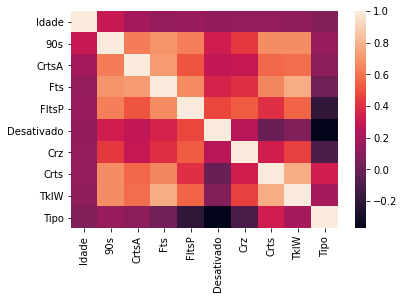

<IPython.core.display.Javascript object>

In [10]:
sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns)

In [11]:
# Features
X = df.drop(["Tipo", "Desativado", "Crz", "FltsP"], axis=1)

# Target
y = df[["Tipo"]]

# Trainig-Test spliting
training, testing, training_labels, testing_labels = train_test_split(
    X, y, test_size=0.25, random_state=42
)

<IPython.core.display.Javascript object>

In [12]:
# Normalize Data

scaler = StandardScaler()

normed_train_data = pd.DataFrame(scaler.fit_transform(training), columns=X.columns)
normed_test_data = pd.DataFrame(scaler.fit_transform(testing), columns=X.columns)

<IPython.core.display.Javascript object>

In [13]:
clf = RandomForestClassifier()
clf.fit(training, training_labels.values.ravel())

preds = clf.predict(testing)

print(clf.score(training, training_labels))
print(clf.score(testing, testing_labels))

0.9946236559139785
0.7165775401069518


<IPython.core.display.Javascript object>

In [14]:
pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(
    by=0, ascending=False
)

,0
Crts,0.247270
90s,0.213932
Fts,0.188279
Idade,0.145314
TklW,0.129055
CrtsA,0.076150


<IPython.core.display.Javascript object>

###### 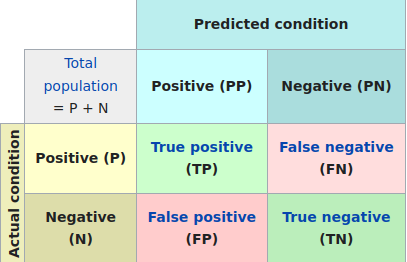

In [15]:
confusion_matrix(testing_labels, preds, labels=[0, 1])

array([[49, 33],
       [20, 85]])

<IPython.core.display.Javascript object>